# Examination of trends, percentage changes, and rolling time in the US MRTS

# Title

**Mondher Bejaoui**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project contains the specifications of the three main functions to extract, transform, and load the Monthly Retail Trade Survey data automatically into a local system, and analyze the the trend of sales in the retail and food services kind-of-business records, which is based on similarity. The project describes the result of a study that examines trends in seasonal patter, monthly and yearly sales. Percentage changes in men's and women's clothing in a manner that allows to visualize correlation changes over time. Further, the project examines the rolling time windows and computes the average three-month window, six-month window, and the last twelve-month window (LTM) to reduce short-term volatility in records.  

[Back to top](#Index)


## 1. Introduction
The Monthly Retail Trade Survey carries two specifications: 
### A. Extract, Transform, Load (ETL):
Designed software tools that are specifics to perform three main functions such as extraction, transformation, and loading data automatically. This particular tool retreive the data from availablre sources, improve the quality of the extracted data, and finally load it into a system. 

**a**) **Extraction**: Retreive the excel file of the Monthly Retail Trade Survey estimates of sales at retail and food services stores and inventories held by retail stores and collected by the U.S. Census Bureau.

**b**) **Transformation**: In this phase data cleaning and transformation is carried out. Removed values that are inconsistent, duplicate, or reduce the response time required by the query and analysis in the data such as header and footer. Dropped the Total and the industry codes NAICS columns. Renamed the Unnamed column to Kind-of-business, transposed columns for time series and reshaped the dataframe using pandas melt. 

**c**) **Load**: The final process after extraction and modification is to load the CSV file into a SQL database. Imported a SQL connector and wrote an installation script to create a database, data table that iterates over the dataframe and inserts it into the table to prepare the analysis.

### B. Analysis and visualization:
I investigated the trend of sales in the retail and food services to generate clean trend. Compared three business sales: book stores, sporting goods stores, and hobby toy/game stores. Plotted annual and monthly trends to identify the highest and faster growth, seasonal pattern, and changes. Generated reference plots for percentage changes by looking at men's and women's clothing. Find the correlation and records of changers over time. Finally, For the time seriies model, I used a rolling average to set a function with parameter windows which signifies three intervals: three, six, and twelve-month that quantifies trends in the observed metrics. 







[Back to top](#Index)

## 2. Extract-Transform-Load

The analysis and visualization of the Monthly Retail Trade Survey requires a clean, meaningful, and improved quality of data to makes it easy to write functions, format SQL and Python scripts, and pass queries to the database to generates analysis insights. The process to obtain sales activities and trends begins with the acronym ETL (Extract-Transform-Load).

[Back to top](#Index)

### 2.1 The ETL Process

Because the Monthly Retail Trade Survey (MRTS) supports multidemensional presentation, and to load the data for computation and analysis. The specifics to obtain the desire analytics and business intelligence are as follows: 

# [Back to top](#Index)

### 2.2 Data Exploration

The United States Census Bureau provides a Monthly Retail Trade Survey dataset that generates timely estimates of the level and trend sales of retail and food services stores and inventories held by retail stores. The MRTS data estimates are composed of a list sample and area sample, used by government agencies and research institutions to analyze economic activity, to develop consumer price indexes and productivity measurements, and assess recent trends in consumer purchases. The dataset is a sample of approximately 13,000 retail firms, a major component of Gross Domestic Product (GDP) published six weeks after the reference month, the release contains preliminary current-month estimates and revised estimates for the previous month. Statistics include: Sales, Inventories, and Inventories/sales ratios. The estimates are seasonally adjusted and unadjusted. 

For the purpose of this project I selected the unadjusted preliminary and final U.S. retail sales, and the dataset required specific data points to be identified for extraction. 



[Back to top](#Index)

### 2.3 Data Preparation
To transfer the excel file into a dataframe, I imported the pandas libraries and read the dataset. Performed a preliminary data cleaning by removing the footnotes and header and dropped unnecessary columns such as the industry codes (NAISC) and Total columns, then created a loop to identify each year dataset sheets (from 1992-2021). Further modifications of melting type and renaming were conducted. Renamed columns to reflect the classification and description of data readability (e.i. businesses column description, date format). Replaced the data type of the (S) and (NA), used **astype** to melt the data and read in three specific columns (Business Identification = Kind_of_business, Date = Period, Value of sales = Value)   
Describe which modifications you want to perform on your dataset so that it’s ready for analysis. A few obvious ones are suggested in the video, but come up with at least one modification on your own as well.


In [ ]:
# read the excel file with pandas (specific year 2020)
import pandas as pd
df = pd.read_excel("mrtssales92-present.xls", sheet_name="2020", skiprows=4, skipfooter=47)
df 

In [ ]:
# drop cloumns 0 and 14
df.drop(df.columns[[0,14]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  67 non-null     object
 1   Jan. 2020   65 non-null     object
 2   Feb. 2020   65 non-null     object
 3   Mar. 2020   65 non-null     object
 4   Apr. 2020   65 non-null     object
 5   May 2020    65 non-null     object
 6   Jun. 2020   65 non-null     object
 7   Jul. 2020   65 non-null     object
 8   Aug. 2020   65 non-null     object
 9   Sep. 2020   65 non-null     object
 10  Oct. 2020   65 non-null     object
 11  Nov. 2020   65 non-null     object
 12  Dec. 2020   65 non-null     object
dtypes: object(13)
memory usage: 6.9+ KB


In [ ]:
# rename columns
df.rename(columns={'Unnamed: 1': 'Kind of Business'}, inplace=True)
df

Kind of Business Jan. 2020 Feb. 2020  \
0                                        NOT ADJUSTED       NaN       NaN   
1               Retail and food services sales, total    480301    478467   
2   Retail sales and food services excl motor vehi...    386934    380639   
3   Retail sales and food services excl gasoline s...    440605    441504   
4   Retail sales and food services excl motor vehi...    347238    343676   
..                                                ...       ...       ...   
62                                    Drinking places       (S)       (S)   
63                Restaurants and other eating places     54131     54911   
64                           Full service restaurants     27018       (S)   
65                      Limited service eating places     27113     27062   
66                                        ADJUSTED(2)       NaN       NaN   

   Mar. 2020 Apr. 2020 May 2020 Jun. 2020 Jul. 2020 Aug. 2020 Sep. 2020  \
0        NaN       NaN      NaN       NaN       NaN       NaN       NaN   
1     478267    407227   504607    532678    549416    545307    530987   
2     395880    337693   397245    418450    433183    429379    417929   
3     444006    380417   472562    496364    510540    506577    493756   
4     361619    310883   365200    382136    394307    390649    380698   
..       ...       ...      ...       ...       ...       ...       ...   
62       (S)       (S)      (S)       (S)       (S)       (S)       (S)   
63     42238     27674    39803     48350     51178     52457     50423   
64       (S)       (S)      (S)       (S)       (S)       (S)       (S)   
65     24159     20001    26498     28789     30214     30013     28743   
66       NaN       NaN      NaN       NaN       NaN       NaN       NaN   

   Oct. 2020 Nov. 2020 Dec. 2020  
0        NaN       NaN       NaN  
1     553114    543273    611429  
2     438435    440053    494937  
3     514953    508879    574794  
4     400274    405659    458302  
..       ...       ...       ...  
62       (S)       (S)       (S)  
63     52829     46984     47987  
64       (S)       (S)       (S)  
65     29950     27249     28640  
66       NaN       NaN       NaN  

[67 rows x 13 columns]

In [11]:
# Transpose the dataframe
df_melted = df.melt(id_vars="Kind of Business", value_vars=df.columns[1:])
df_melted.head(10)

Kind of Business   variable   value
0                                       NOT ADJUSTED  Jan. 2020     NaN
1              Retail and food services sales, total  Jan. 2020  480301
2  Retail sales and food services excl motor vehi...  Jan. 2020  386934
3  Retail sales and food services excl gasoline s...  Jan. 2020  440605
4  Retail sales and food services excl motor vehi...  Jan. 2020  347238
5                                Retail sales, total  Jan. 2020  418734
6  Retail sales, total (excl. motor vehicle and p...  Jan. 2020  325367
7                                            GAFO(1)  Jan. 2020   94549
8                    Motor vehicle and parts dealers  Jan. 2020   93367
9         Automobile and other motor vehicle dealers  Jan. 2020   85832

In [12]:
# loop through all the years (1992-2021)
sheets = ["2021","2020","2019","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009",
         "2008","2007","2006","2005","2004","2003","2002","2001","1999","1998","1997","1996","1995",
         "1994","1993","1992"]
columns={'Unnamed: 1': 'Kind of Business'}

# print all the years
for n in sheets:
    df = pd.read_excel("mrtssales92-present.xls", sheet_name="2020", skiprows=4, skipfooter=47)
    print(n)

2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
1999
1998
1997
1996
1995
1994
1993
1992


In [78]:
# preprocess to melt data, rename colmns and change formats

def preprocess_table(n):
    df = pd.read_excel("mrtssales92-present.xls", sheet_name= n, skiprows=4, skipfooter=47)
    df.drop(df.columns[[0,14]], axis=1, inplace=True)
    df.rename(columns={'Unnamed: 1': 'Kind of Business'}, inplace=True)
    df_melted = df.melt(id_vars="Kind of Business", value_vars=df.columns[1:])
    df_melted.replace("(S)","0", inplace=True)
    df_melted.replace("(NA)","0", inplace=True)
    df_melted.dropna(axis=0, inplace=True)
    df_melted["value"] = df_melted["value"].astype(float)
    df_melted.rename({'variable':'period'}, axis=1, inplace=True)
    df_melted = df_melted.astype({'period':'datetime64[ns]'})
    return df_melted 

In [79]:
# print the melted dataset
df_melted

Kind of Business   variable   value
0                                         NOT ADJUSTED  Jan. 2020     NaN
1                Retail and food services sales, total  Jan. 2020  480301
2    Retail sales and food services excl motor vehi...  Jan. 2020  386934
3    Retail sales and food services excl gasoline s...  Jan. 2020  440605
4    Retail sales and food services excl motor vehi...  Jan. 2020  347238
..                                                 ...        ...     ...
799                                    Drinking places  Dec. 2020     (S)
800                Restaurants and other eating places  Dec. 2020   47987
801                           Full service restaurants  Dec. 2020     (S)
802                      Limited service eating places  Dec. 2020   28640
803                                        ADJUSTED(2)  Dec. 2020     NaN

[804 rows x 3 columns]

In [80]:
# preprocess testing year 2020
preprocess_table("2020")

Kind of Business     period     value
1                Retail and food services sales, total 2020-01-01  480301.0
2    Retail sales and food services excl motor vehi... 2020-01-01  386934.0
3    Retail sales and food services excl gasoline s... 2020-01-01  440605.0
4    Retail sales and food services excl motor vehi... 2020-01-01  347238.0
5                                  Retail sales, total 2020-01-01  418734.0
..                                                 ...        ...       ...
798                  Food services and drinking places 2020-12-01   51497.0
799                                    Drinking places 2020-12-01       0.0
800                Restaurants and other eating places 2020-12-01   47987.0
801                           Full service restaurants 2020-12-01       0.0
802                      Limited service eating places 2020-12-01   28640.0

[780 rows x 3 columns]

[Back to top](#Index)

### 2.4 Read the Data Using Python

The mechanism of the Comma Seperated Values (CSV) file allows data to be stored into plain text format. Python can be used to read CVS files in two ways: 

#### 1) Using the CSV library 

The **.reader()** methods allows the reading of the csv file.

The **with** keyword allows us to both open and close the file without having to explicitly close it.

The **open()** method takes two arguments of type string. First the file name, and second a mode argument. We are using r for read, however this can be omitted as r is assumed by default. And iterate over the rows. 
#### 2) Using the Pandas libray: 
Import Python library is used to conduct data manipulation and analysis. It contains the **.read_csv()** that allows the reading of csv files.



[Back to top](#Index)

### 2.4.1 Reading Sample Data

Created a small dataset of United States public library holdings of print materials, electronic books, and audio/video.

In [ ]:
# using Python native open/read

libraries_association = open('libraries_association.csv', 'r')
print(libraries_association.read())
libraries_association.close()

Library Name,Print materials,Electronic books,Audio and video,Total holdings
"New York Public Library, NY","24,389,522","1,642,944","2,366,904","25,899,720"
"Boston Public Library, MA","10,345,866","150,822","230,491","10,455,891"
"Detroit Public Library, MI","7,985,044","29,544","458,722","7,832,844"
"Public Library of Cincinnati, OH","6,580,422","281,944","1,592,839","7,655,924"
"Los Angeles Public Library, CA","6,877,320","178,329","798,425","7,481,902"
"Chicago Public Library, IL","6,499,702","58,719","924,603","7,115,839"
"San Diego Public Library, CA","5,893,077","162,958","652,931","6,889,512"
"Hennepin County Library, MN","         5,390,523","311,946","410,894","6,178,933"
"Dallas Public Library, TX","5,122,850","54,318","401,899","5,902,746"
"Allen County Public Library, IN","4,985,604","304,899","631,902","5,543,701"
"Miami-Dade Public Library System, FL","4,390,056","46,904","439,063","4,891,754"
"Hawaii Public Library System, HI","4,295,043","51,399","513,622","4,651,932"


In [2]:
# using Pandas read csv file

import pandas as pd

libraries_association = pd.read_csv('libraries_association.csv')
libraries_association

Library Name     Print materials  \
0                    New York Public Library, NY          24,389,522   
1                      Boston Public Library, MA          10,345,866   
2                     Detroit Public Library, MI           7,985,044   
3               Public Library of Cincinnati, OH           6,580,422   
4                 Los Angeles Public Library, CA           6,877,320   
5                     Chicago Public Library, IL           6,499,702   
6                   San Diego Public Library, CA           5,893,077   
7                    Hennepin County Library, MN           5,390,523   
8                      Dallas Public Library, TX           5,122,850   
9                Allen County Public Library, IN           4,985,604   
10          Miami-Dade Public Library System, FL           4,390,056   
11              Hawaii Public Library System, HI           4,295,043   
12  Kansas City Mid-Continent Public Library, MO           3,879,544   
13   Las Vegas-Clark County Library District, NV           3,566,308   
14              Free Library of Philadelphia, PA           3,244,790   
15        City of St.Louis Municipal Library, MO           3,122,956   
16               Montgomery Public Libraries, MD           3,028,421   

   Electronic books Audio and video Total holdings  
0         1,642,944       2,366,904     25,899,720  
1           150,822         230,491     10,455,891  
2            29,544         458,722      7,832,844  
3           281,944       1,592,839      7,655,924  
4           178,329         798,425      7,481,902  
5            58,719         924,603      7,115,839  
6           162,958         652,931      6,889,512  
7           311,946         410,894      6,178,933  
8            54,318         401,899      5,902,746  
9           304,899         631,902      5,543,701  
10           46,904         439,063      4,891,754  
11           51,399         513,622      4,651,932  
12          168,933         682,954      4,211,785  
13          208,752         930,449      4,029,811  
14          234,970         568,923      3,987,944  
15           32,588         260,491      3,259,022  
16          183,592         190,857      3,191,439

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

This section was previously covered. Read the MRTS data using the pandas library.


In [3]:
## Using Python script:

import csv

# open file
with open('monthlychart_data.csv') as read_file:

# read csv file
     csv_reader = csv.reader(read_file, delimiter=',')

# loop through data
     for row in csv_reader:
          print(row)
        

['', 'Kind of Business', 'period', 'value']
['1', 'Retail and food services sales, total', '2020-01-01', '480301.0']
['2', 'Retail sales and food services excl motor vehicle and parts', '2020-01-01', '386934.0']
['3', 'Retail sales and food services excl gasoline stations', '2020-01-01', '440605.0']
['4', 'Retail sales and food services excl motor vehicle and parts and gasoline stations', '2020-01-01', '347238.0']
['5', 'Retail sales, total', '2020-01-01', '418734.0']
['6', 'Retail sales, total (excl. motor vehicle and parts dealers)', '2020-01-01', '325367.0']
['7', 'GAFO(1)', '2020-01-01', '94549.0']
['8', 'Motor vehicle and parts dealers', '2020-01-01', '93367.0']
['9', 'Automobile and other motor vehicle dealers', '2020-01-01', '85832.0']
['10', 'Automobile dealers', '2020-01-01', '81214.0']
['11', 'New car dealers', '2020-01-01', '72074.0']
['12', 'Used car dealers', '2020-01-01', '9140.0']
['13', 'Automotive parts, acc., and tire stores', '2020-01-01', '7535.0']
['14', 'Furniture

In [4]:
import mysql.connector as mysql
from mysql.connector import Error

try:
    conn = mysql.connect(host='localhost', user='root',  
                        password='8eL43NthR2c:')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute('DROP DATABASE IF EXISTS `mrts_data`')
        cursor.execute("CREATE DATABASE mrts_data")
        print("mrts_data database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

[Back to top](#Index)

### 2.5 Writing an Installation Script

Python installation script to create and read your dataset in MySQL WorkBench.

In [ ]:
# Create database, and insert tables
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', 
                           database='mrts_data', user='root', 
                           password='password')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS mrts_table;')
        print('Creating table mrts_table....')
        cursor.execute("CREATE TABLE `mrts_table` (`tableID` int NOT NULL AUTO_INCREMENT, `kind_of_business` varchar(250) NULL, `value` FLOAT(10) NULL, `period` varchar(250) NULL, PRIMARY KEY(`tableID`), INDEX `tableID` (`tableID` ASC), INDEX `kind_of_business` (`kind_of_business` ASC)) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci")
        print("Table is created....")
    
        for i, row in monthlychart_df.iterrows():
                sql = "INSERT INTO `mrts_table`(`kind_of_business`, `period`, `value`)  VALUES (%s, %s, %s)"
                cursor.execute(sql, tuple(row))
                print("Record inserted")
                # the connection is not autocommitted by default, so we must commit to save our changes
                conn.commit()
#         cursor.close()
#         conn.close()
except Error as e:
    print("Error while connecting to MySQL", e)

    
#         for i,row in mrts_data.iterrows():
#             sql = "INSERT INTO mrts_data.mrts_table VALUES (%s,%s,%s)" 
#             print('sql insert: ', sql)
#             cursor.execute(sql, tuple(row))
#             print("Record inserted")
#             # the connection is not autocommitted by default, so we must commit to save our changes
#             conn.commit()
# except Error as e:
#     print("Error while connecting to MySQL", e) 

You're connected to database:  ('mrts_data',)
Creating table mrts_table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record 


[Back to top](#Index)

## 3. Analysis and Visualization

From the previous queries on the Monthly Retail Trade Survey, the advasntage of MySQL workbench allows to load, edit and run queries against MySQL server mrts_data. It has utilities for viewing data and exporting it. Multiple queries can be run and results automatically displayed in different tabs. Also, the queries are saved in the history panel for later retrieval and running. However, MySQL functions have fewer applications than Python, instead of using functions, Python uses libraries, for the MRTS data I relied on Pandas library for data analysis. When retrieving the data MySQL workbench were easy to apply but for sebsequent analysis and visualization Python may be more specific for computations. 



[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Running a query in MySQL workbench on the mrts_data and worked as expected. For example: 

**SELECT** 

DATE_FORMAT(period,'%m/%d/%Y') as month,

kind_of_business,

Value as sales

**FROM** mrts_data.mrts_table

**WHERE** kind_of_business IN ('Electronic shopping and mail-order houses')

[Back to top](#Index)

### 3.2 Running Queries From Python

To query data in a MySQL mrts database from Python, I incorporate the following steps: Connect to the MySQL Database, get a MySQLConnection object. Instantiate a MySQLCursor object from the the MySQLConnection object. Use the cursor to execute a query by calling its execute() method. Example: 

**cnx=mysql.connector.connect**(user='root',
    password='password',
    host='localhost',
    database='mrts_data')

**cursor = cnx.cursor()**



sqlel = (""" 

**SELECT** 

DATE_FORMAT(period,'%m/%d/%Y') as month,
kind_of_business,
Value as sales

**FROM** mrts_data.mrts_table

**WHERE** kind_of_business IN ('Electronic shopping and mail-order houses') ;
    """)


**cursor.execute(sqlel)**  
    
**list = cursor.fetchall()**
electronic_mail = pd.DataFrame (list, columns=['month','kind_of_business','sales'])

electronic_mail.month = pd.to_datetime(electronic_mail.month)
                        
electronic_mail['moving_average_3'] = electronic_mail['sales'].rolling(window=3).mean()

electronic_mail['moving_average_6'] = electronic_mail['sales'].rolling(window=6).mean()

electronic_mail['moving_average_12'] = electronic_mail['sales'].rolling(window=12).mean()

**print(electronic_mail)**

**cursor.close()**
 

[Back to top](#Index)

### 3.3 Explore Trends

The economic trend in business suggests a general behavior among businesses. A new industry that gains traction in the market. It can be used to determine the current state of a market in order to make investment decisions and represents the general economy's market sentiment, this sentiment is closely correlated with the consumer confidence index, which is a metric that tracks how confident individuals are to spend money. A high index is evidence of an economy in an upward trend due to how easily consumers buy goods and services, a downward trend indicates that consumer are hesistant to purchase products or services. 

The trend of the retail and food services were virtually unchanged between 1992-2007 maintained an upward trend prior to the financial crisis of 2008. Between 2008 and the 3rd Quarter of 2009 the retail and food services had a decrease in consumer demand that the trend was effected. Consumers gain confidence on the last quarter of 2009 and the trend maintain an upward expectations until 2019. The retail sales in 2019 nonessential businesses were shut down due to the pandemic, a decline of sales is recorded month-over-month, effected quaterly repports and had a downward trend for the annual total sales. The first 6 months of 2020 were no exceptions, nonessential stores remain closed, unemployment rate were high and consumers confidence to spend money is declined. In june 2020 the retail and and food services sales rose comparing to the first 2 quarters of the year. The rebound of total sales reflect a pent-up demand by consumers.  

The seasonal sales increased by a supported September's back to school demand, parent sentiment regarding lack of confidence in spending has no factor as school supplies are essential requirement for students' success. The clothing industry as we will see in the next chapter did not experience the same demands, students were not required to attend in person, most schools elected online learning during the first phase of the pandemic and demands for apparel and clothing stores undergo downward trend comparing to the pre-pandemic seasons.   


('01-01-2020', 960602)
('01-02-2020', 956934)
('01-03-2020', 956534)
('01-04-2020', 814454)
('01-05-2020', 1009214)
('01-06-2020', 1065356)
('01-07-2020', 1098832)
('01-08-2020', 1090614)
('01-09-2020', 1061974)
('01-10-2020', 1106228)
('01-11-2020', 1086546)
('01-12-2020', 1222858)
('01-01-2019', 456538)
('01-02-2019', 442274)
('01-03-2019', 513845)
('01-04-2019', 506920)
('01-05-2019', 544203)
('01-06-2019', 515269)
('01-07-2019', 528710)
('01-08-2019', 541951)
('01-09-2019', 493076)
('01-10-2019', 522195)
('01-11-2019', 532130)
('01-12-2019', 587471)
('01-01-2018', 444286)
('01-02-2018', 435373)
('01-03-2018', 508383)
('01-04-2018', 480373)
('01-05-2018', 527991)
('01-06-2018', 507106)
('01-07-2018', 505209)
('01-08-2018', 520544)
('01-09-2018', 477137)
('01-10-2018', 503602)
('01-11-2018', 518457)
('01-12-2018', 556614)
('01-01-2017', 421943)
('01-02-2017', 418315)
('01-03-2017', 483082)
('01-04-2017', 465788)
('01-05-2017', 494621)
('01-06-2017', 481729)
('01-07-2017', 475374)
('0

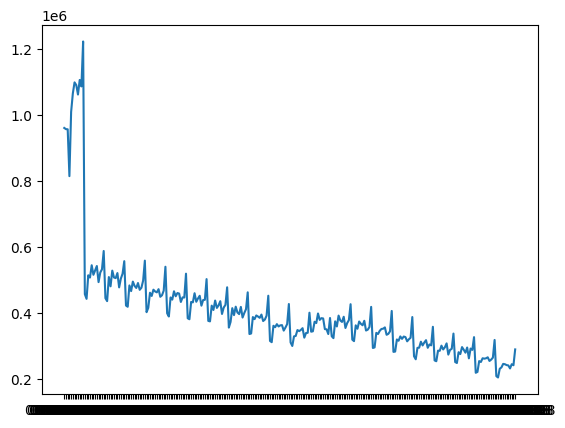

In [ ]:
import mysql.connector
import matplotlib.pyplot as plt

cnx=mysql.connector.connect(user='root',
    password='8eL43NthR2c:',
    host='localhost',
    database='mrts_data')

cursor = cnx.cursor()

sql = ("""
    SELECT DATE_FORMAT(period,'%d-%m-%Y'), CAST(sum(value) as UNSIGNED) as sales
    FROM mrts_table
    Where kind_of_business = 'Retail and food services sales, total'
    GROUP BY 1
""")

cursor.execute(sql)

month = []
sales = []

# print all the first cell of all the rows
for row in cursor.fetchall():
    print(row)
    month.append(row[0])
    sales.append(row[1])

cursor.close()
cnx.close()

plt.plot(month,sales)
plt.show()


**Python script**

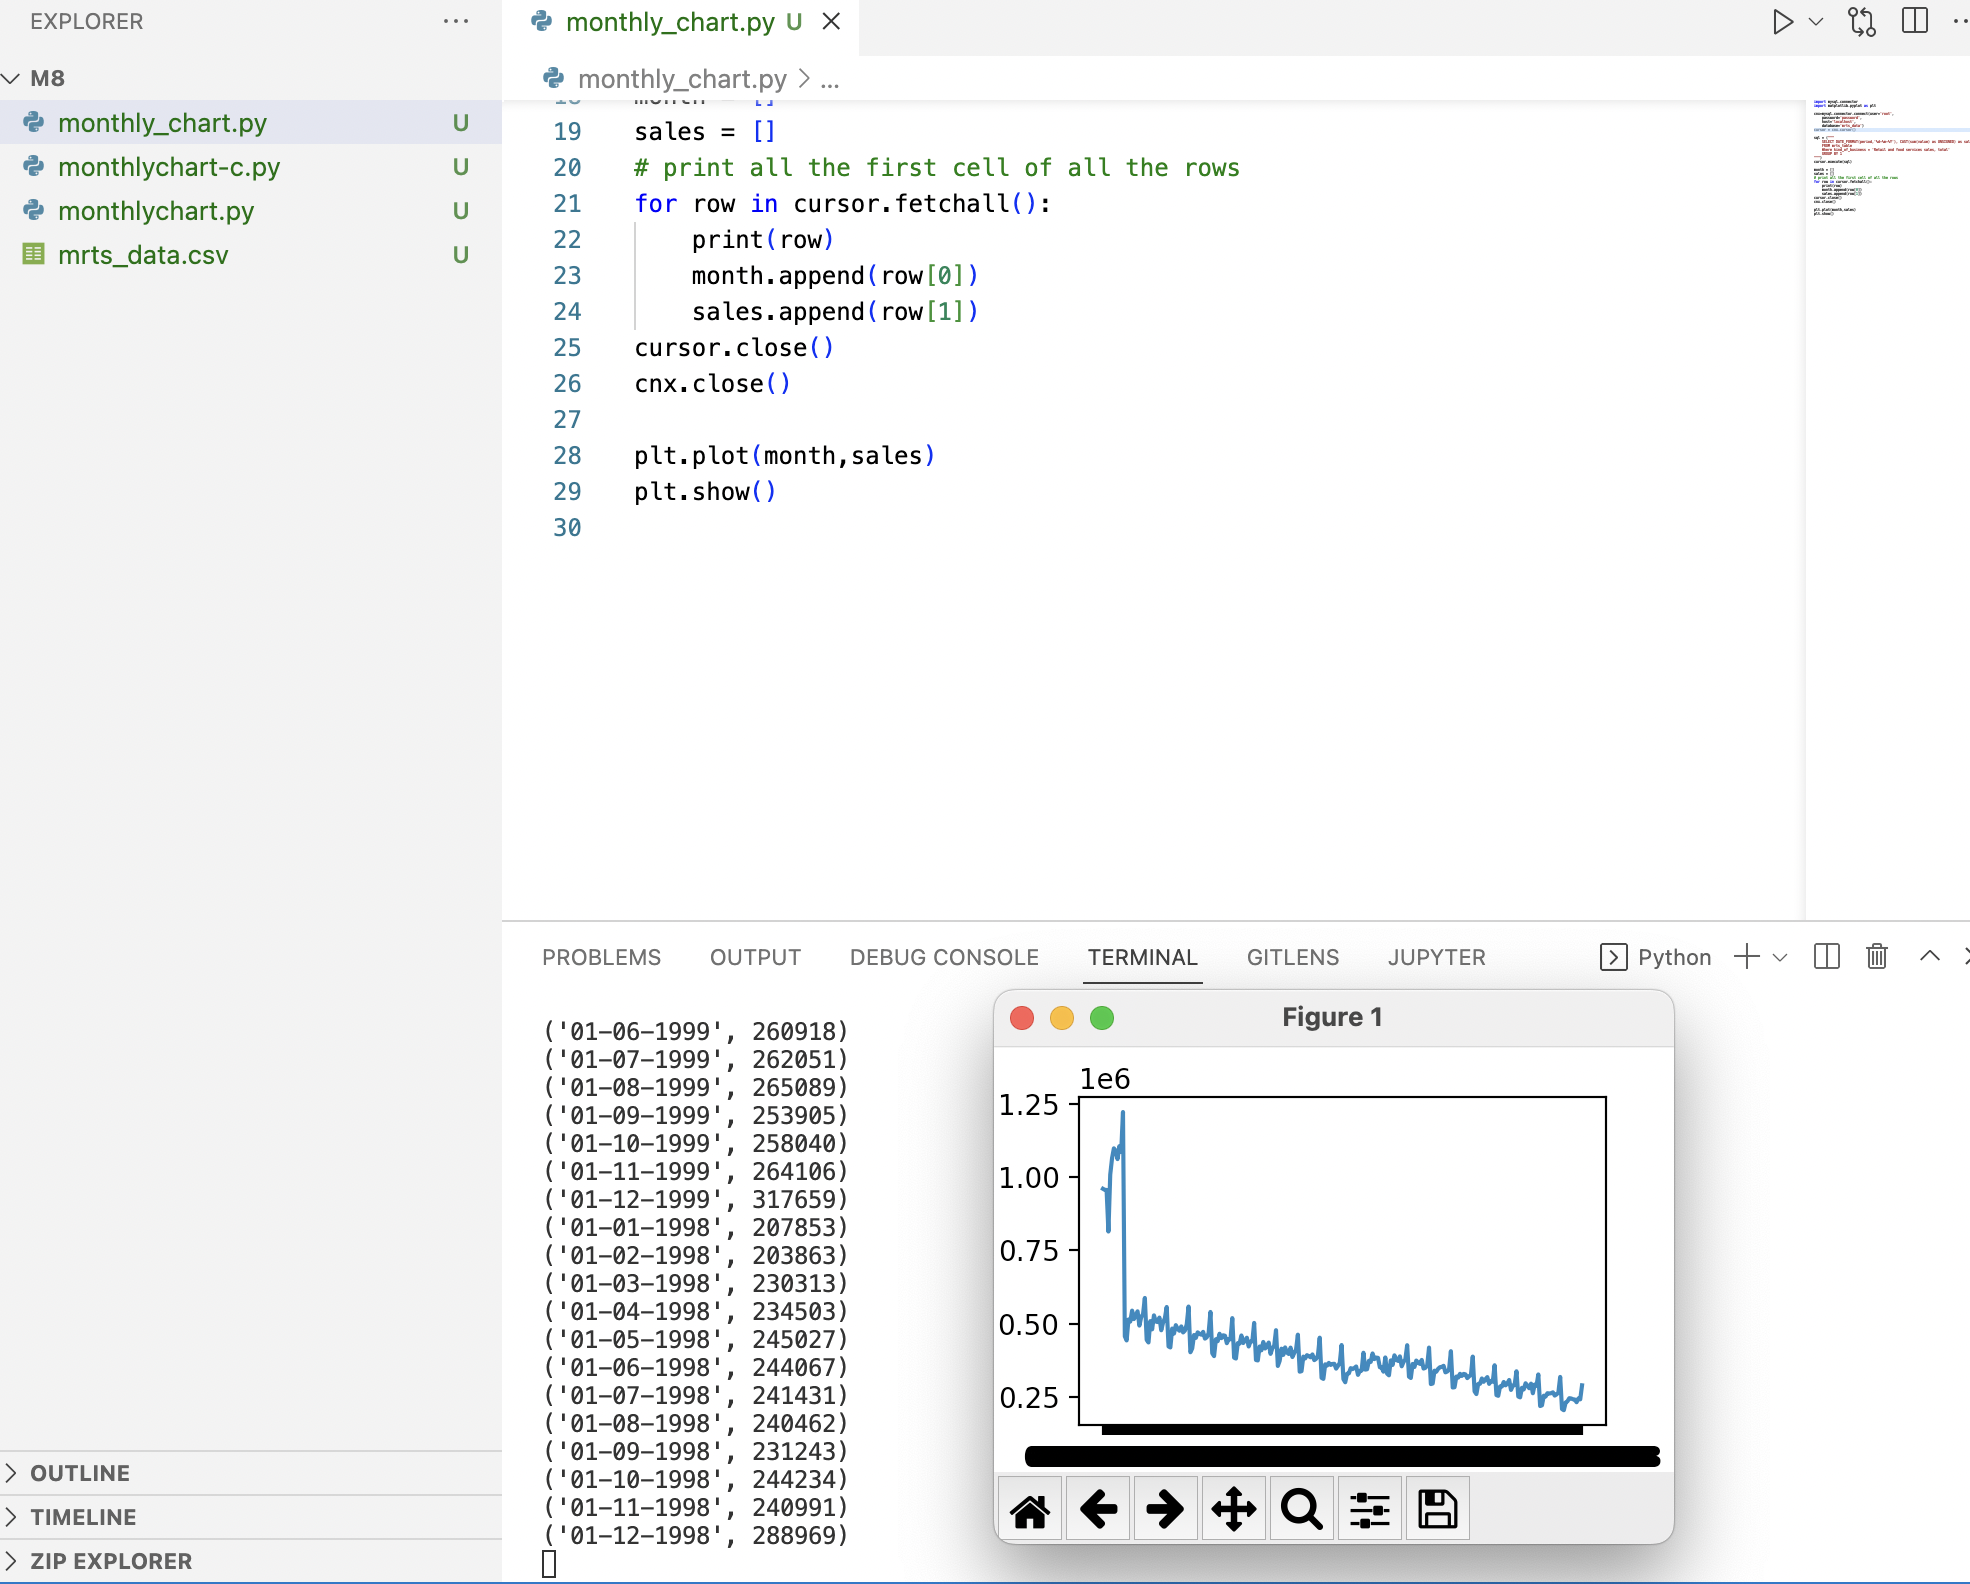




         month     sales
0   2020-01-01  480301.0
1   2020-02-01  478467.0
2   2020-03-01  478267.0
3   2020-04-01  407227.0
4   2020-05-01  504607.0
..         ...       ...
271 1998-08-01  240462.0
272 1998-09-01  231243.0
273 1998-10-01  244234.0
274 1998-11-01  240991.0
275 1998-12-01  288969.0

[276 rows x 2 columns]


<AxesSubplot:title={'center':'Food and Retail Services Sales, Total'}, xlabel='Monthly data', ylabel='sales'>

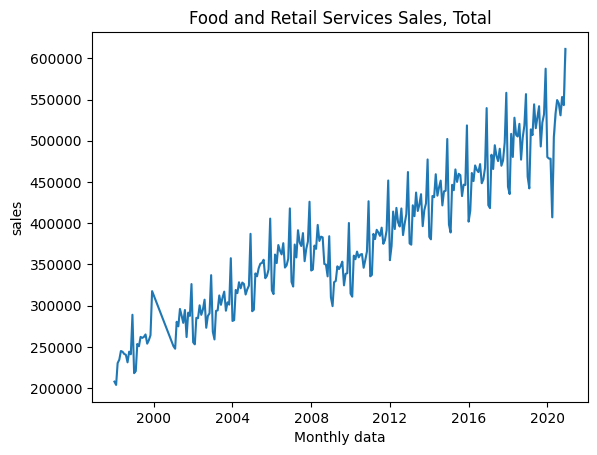

In [ ]:
#import data from SQL for Retail and food services sales

import matplotlib.pyplot as plt
from mysql.connector import Error
import seaborn as sns 


cnx=mysql.connector.connect(host='localhost', port='3306', user='root',  
                    password='8eL43NthR2c:', database= 'mrts_data')
  
cursor = cnx.cursor()

sql = ("""
SELECT
    DATE_FORMAT(period,'%m/%d/%Y') as month,
    value as sales
FROM mrts_data.mrts_table
WHERE 
    kind_of_business = 'Retail and food services sales, total'
    
    """)

cursor.execute(sql)

list = cursor.fetchall()
rf = pd.DataFrame (list, columns=['month','sales'])

rf.month = pd.to_datetime(rf.month)
print(rf)

#graph monthly data 

g1 = sns.lineplot(data=rf, x='month', y='sales')
g1.set_xlabel("Monthly data")
g1.set_title("Food and Retail Services Sales, Total")
g1 

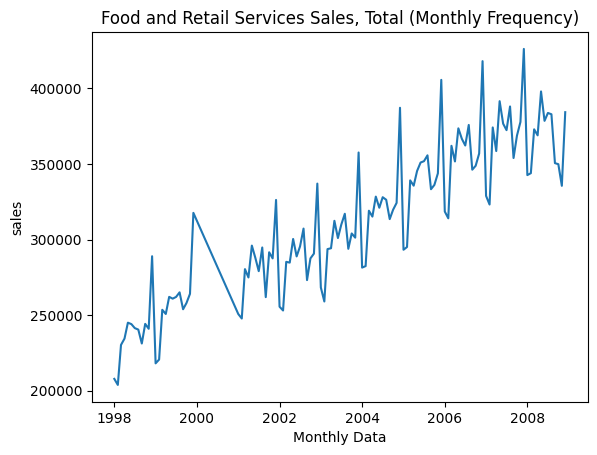

In [ ]:
# Monthly data

rf2 = rf.iloc[156:]
rf2
g2 = sns.lineplot(data=rf2, x='month', y='sales')
g2.set_xlabel("Monthly Data")
g2.set_title("Food and Retail Services Sales, Total (Monthly Frequency)")
plt.show()

   year      sales
0  1998  2852956.0
1  1999  3086990.0
2  2001  3378906.0
3  2002  3459077.0
4  2003  3612457.0
5  2004  3846605.0
6  2005  4085746.0
7  2006  4294359.0
8  2007  4439733.0
9  2008  4391580.0


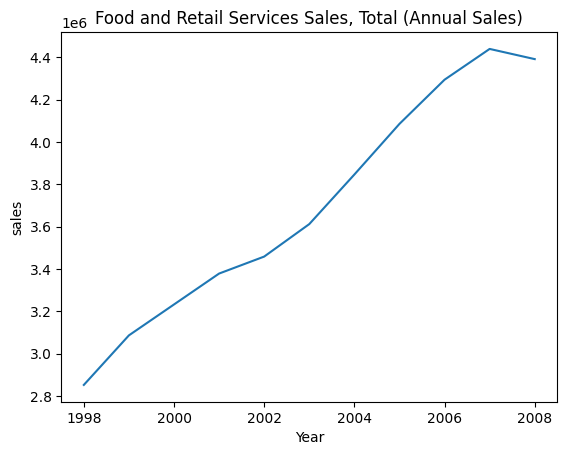

In [ ]:
# Annual data 

rf["year"] = rf["month"].dt.year
rf["quarter"] = rf["month"].dt.quarter
rf2 = rf.iloc[156:]

yearrf = rf2.drop('month', axis=1)
yearrf = rf2.groupby(['year'])['sales'].sum().reset_index()
print(yearrf)
g3 = sns.lineplot(data=yearrf, x='year', y='sales')
g3.set_xlabel("Year")
g3.set_title("Food and Retail Services Sales, Total (Annual Sales)")
plt.show()

## Bookstores, sporting good stores, and hobbies, toys, and games stores

The data suggests that the sporting goods stores experienced a sizable rise from early 2002 until the most recent year, except during the economic recession of 2008 and the 2019 pandemic. In general the sporting goods retailers enjoyed year-over-year increases compared to the hobbies, toys, and games stores.

In [ ]:
# Import bookstores, sporting goods stores, and hobbies, toys, and games stores data from SQL Database

import matplotlib.pyplot as plt
from mysql.connector import Error
import pandas as pd
import numpy as np


cnx=mysql.connector.connect(user='root',
    password='8eL43NthR2c:',
    host='localhost',
    database='mrts_data')

cursor = cnx.cursor()


sql1 = (""" 
SELECT 
DATE_FORMAT(period,'%m/%d/%Y') as month,
kind_of_business,
Value as sales
FROM mrts_data.mrts_table
WHERE kind_of_business IN ("Book stores" , 'Sporting goods stores','Hobby, toy, and game stores') ;
    """)

cursor.execute(sql1)

    
list = cursor.fetchall()
data = pd.DataFrame (list, columns=['month','kind_of_business','sales'])

data.month = pd.to_datetime(data.month)
data["year"] = data["month"].dt.year
data["quarter"] = data["month"].dt.quarter

# Dataframe to aggregate sales yearly
data1 = data.drop('month', axis=1)
data1 = data.groupby(['kind_of_business','year'])['sales'].sum().reset_index()

# Dataframe to aggregate sales quarterly
data2 = data.drop('month', axis=1)
data2 = data.groupby(['kind_of_business','year', 'quarter'])['sales'].sum().reset_index()
data2["yearByQuarter"] = data2["year"] + data2["quarter"]/10

cursor.close()
conn.close() 

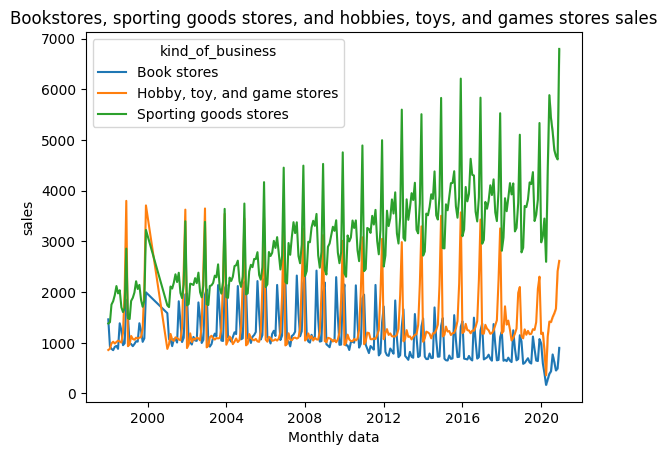

In [ ]:
# Monthly data
monthly = sns.lineplot(data=data, x='month', y='sales', hue='kind_of_business')
monthly.set_xlabel("Monthly data")
monthly.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores sales")

cursor.close()
conn.close()
plt.show()

Text(0.5, 1.0, 'Bookstores, sporting goods stores, and hobbies, toys, and games stores annualized sales')

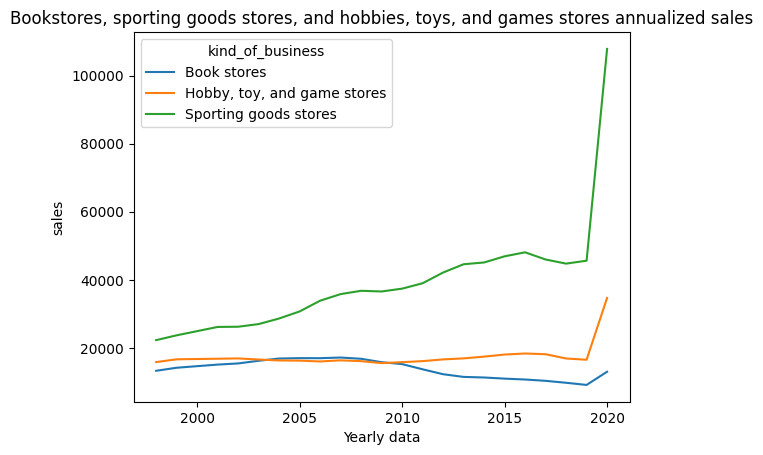

In [ ]:
# Annual data
yearly = sns.lineplot(data=data1, x='year', y='sales', hue='kind_of_business')
yearly.set_xlabel("Yearly data")
yearly.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores annualized sales")

Text(0.5, 1.0, 'Bookstores, sporting goods stores, and hobbies, toys, and games stores quarterly sales')

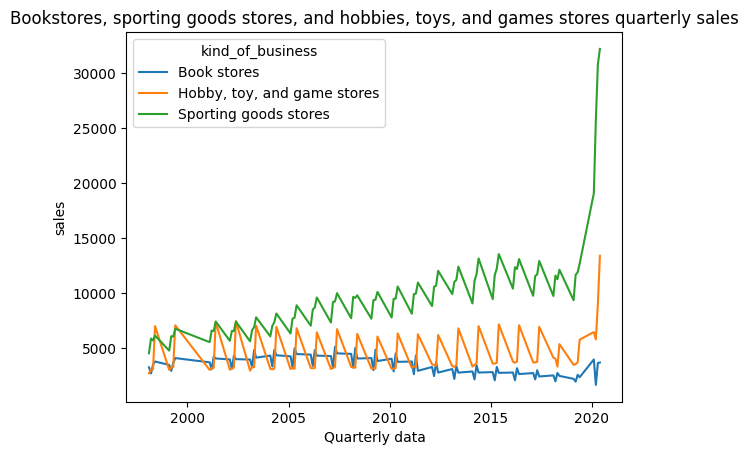

In [ ]:
# Quaterly data 
quarterly = sns.lineplot(data=data2, x='yearByQuarter', y='sales', hue='kind_of_business')
quarterly.set_xlabel("Quarterly data")
quarterly.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores quarterly sales")

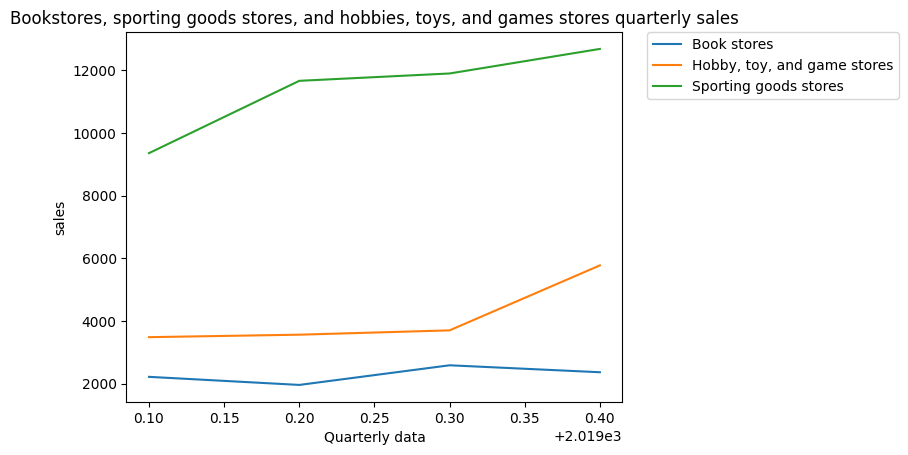

In [ ]:
#Plot quarterly data for only 2017 - 2020

newquar = data[(data['month'] > '2018-12-01') & (data['month'] < '2020-01-01')]
newquar = newquar.drop('month', axis=1)
newquar = newquar.groupby(['kind_of_business','year', 'quarter'])['sales'].sum().reset_index()
newquar["yearByQuarter"] = newquar["year"] + newquar["quarter"]/10

quarterly2 = sns.lineplot(data=newquar, x='yearByQuarter', y='sales', hue='kind_of_business')
quarterly2.set_xlabel("Quarterly data")
quarterly2.set_title("Bookstores, sporting goods stores, and hobbies, toys, and games stores quarterly sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[Back to top](#Index)

### 3.4 Explore Percentage Change

The percentage change queries in the mrts_data (shown below) calculates how much change there has been during two points in time. The result is expressed as a percentage (in absolute numbers, just a difference) displays the rate of change between orginal value and the new subsequent, it is calculated as follows: 


[(value at later time ÷ value at earlier time) - 1] × 100.

**Women's clothing and Men's clothing rate change**:

The MRTS data suggests that women's and men's clothing sales over the years experienced similar trend. The percentage change various, for example 12-month change in 2013 was 2.2 percent and 5.2 percent in 2020. Women spending on clothing is higher than men, women spent 4x higher than men in 2020.



In [ ]:
# Import clothing store sales from SQL Database

cnx=mysql.connector.connect(user='root',
    password='8eL43NthR2c:',
    host='localhost',
    database='mrts_data')

cursor = cnx.cursor()


sql2 = (""" 
SELECT 
DATE_FORMAT(period,'%m/%d/%Y') as month,
kind_of_business,
Value as sales
FROM mrts_data.mrts_table
WHERE kind_of_business IN ("Women's clothing stores" , "Men's clothing stores", 'Clothing stores') ;
    """)


cursor.execute(sql2)

    
    
list = cursor.fetchall()
data_c = pd.DataFrame (list, columns=['month','kind_of_business','sales'])
data_c.month = pd.to_datetime(data.month)

# Calculate percentage change, by 1, 3, 6, and 12 months windows
data_c['pct_ch_1'] = (data.groupby('kind_of_business')['sales']
                                  .apply(pd.Series.pct_change, periods=1) + 1)
data_c['pct_ch_3'] = (data.groupby('kind_of_business')['sales']
                                  .apply(pd.Series.pct_change, periods=3) + 1)
data_c['pct_ch_6'] = (data.groupby('kind_of_business')['sales']
                                  .apply(pd.Series.pct_change, periods=6) + 1)
data_c['pct_ch_12'] = (data.groupby('kind_of_business')['sales']
                                  .apply(pd.Series.pct_change, periods=12) + 1)
print(data_c)

cursor.close()
conn.close()


         month         kind_of_business    sales  pct_ch_1  pct_ch_3  \
0   2020-01-01          Clothing stores  12287.0       NaN       NaN   
1   2020-02-01          Clothing stores  13439.0  0.598990       NaN   
2   2020-03-01          Clothing stores   7584.0  0.684654       NaN   
3   2020-04-01          Clothing stores   1736.0  0.416256  0.170707   
4   2020-05-01          Clothing stores   5504.0  1.627219  0.463744   
..         ...                      ...      ...       ...       ...   
823 1998-08-01  Women's clothing stores   2327.0  1.031899  1.051600   
824 1998-09-01  Women's clothing stores   2244.0  0.834642  0.802358   
825 1998-10-01  Women's clothing stores   2422.0  0.944738  0.813671   
826 1998-11-01  Women's clothing stores   2531.0  1.048538  0.826791   
827 1998-12-01  Women's clothing stores   3630.0  1.696142  1.680188   

     pct_ch_6  pct_ch_12  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  


AxesSubplot(0.125,0.11;0.775x0.77)


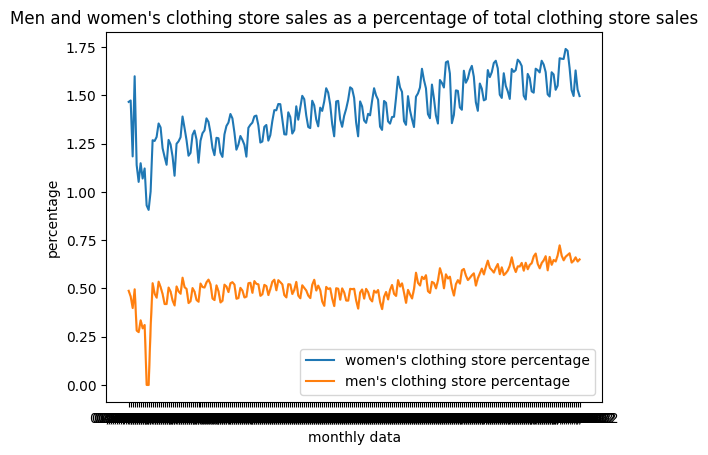

In [ ]:
# All Sales
all_table = data_c.iloc[0:239].copy()
all_table = all_table[['month', 'sales']]
all_table = all_table.rename(columns={'sales': 'all_sales'})

# Men clothing sales
men_table = data_c.iloc[239:552].copy()
men_table = men_table[['month', 'sales']]
men_table = men_table.rename(columns={'sales': 'men_sales'})

# Women Clothing sales
women_table = data_c.iloc[278:].copy()
women_table = women_table[['month', 'sales']]
women_table = women_table.rename(columns={'sales': 'women_sales'})

# Merge men and women clothing sales
all_table = all_table.merge(men_table, on='month', how='left')
all_table = all_table.merge(women_table, on='month', how='left')

# Percentages of men and women
all_table['women_percentage'] = (all_table['women_sales'] / all_table['all_sales'])*100
all_table['men_percentage'] = (all_table['men_sales'] / all_table['all_sales'])*100

# Percentages
all_plot = sns.lineplot(data=all_table, x="month", y='women_percentage',ci=None)
all_plot = sns.lineplot(data=all_table, x="month", y='men_percentage')
all_plot.set_xlabel("monthly data")
all_plot.set_ylabel("percentage")
all_plot.set_title("Men and women's clothing store sales as a percentage of total clothing store sales")
plt.legend(labels=["women's clothing store percentage","men's clothing store percentage"])

print(all_plot)

AxesSubplot(0.125,0.11;0.775x0.77)


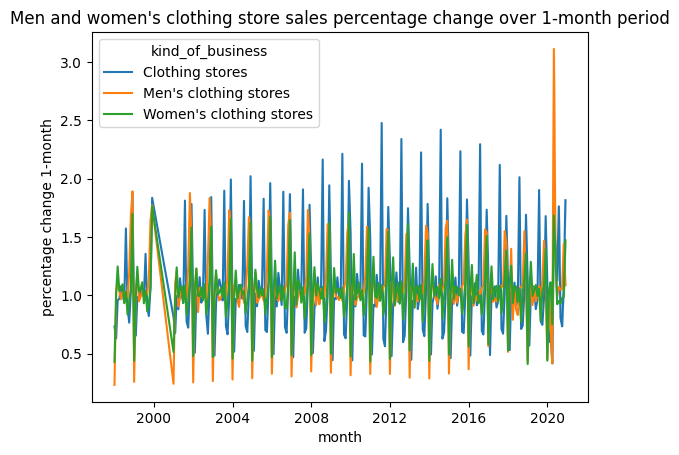

In [ ]:
p1 = sns.lineplot(data=data_c, x='month', y='pct_ch_1', hue='kind_of_business')
p1.set_ylabel("percentage change 1-month")
p1.set_title("Men and women's clothing store sales percentage change over 1-month period")

print(p1)

AxesSubplot(0.125,0.11;0.775x0.77)


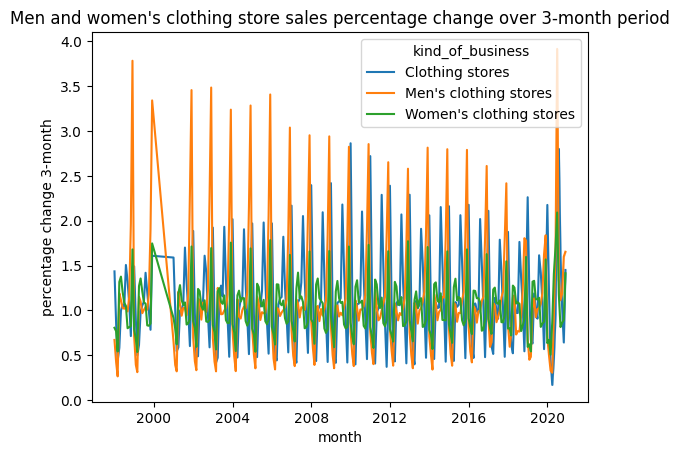

In [ ]:
p3 = sns.lineplot(data=data_c, x='month', y='pct_ch_3', hue='kind_of_business')
p3.set_ylabel("percentage change 3-month")
p3.set_title("Men and women's clothing store sales percentage change over 3-month period")

print(p3)

Text(0.5, 1.0, "Men and women's clothing store sales percentage change over 6-month period")

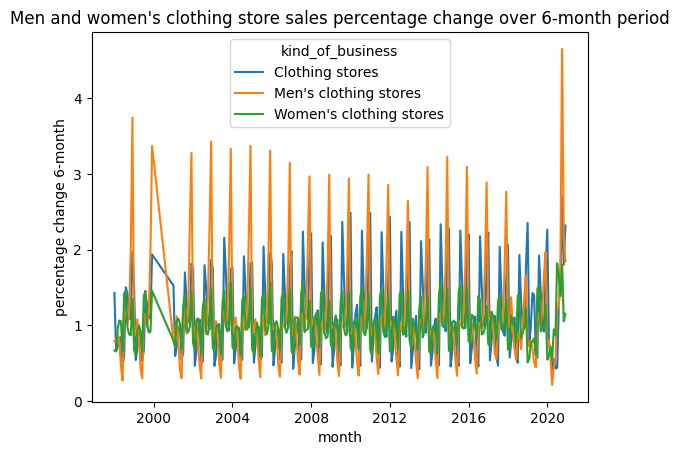

In [ ]:
p6 = sns.lineplot(data=data_c, x='month', y='pct_ch_6', hue='kind_of_business')
p6.set_ylabel("percentage change 6-month")
p6.set_title("Men and women's clothing store sales percentage change over 6-month period")

Text(0.5, 1.0, "Men and women's clothing store sales percentage change over 12-month period")

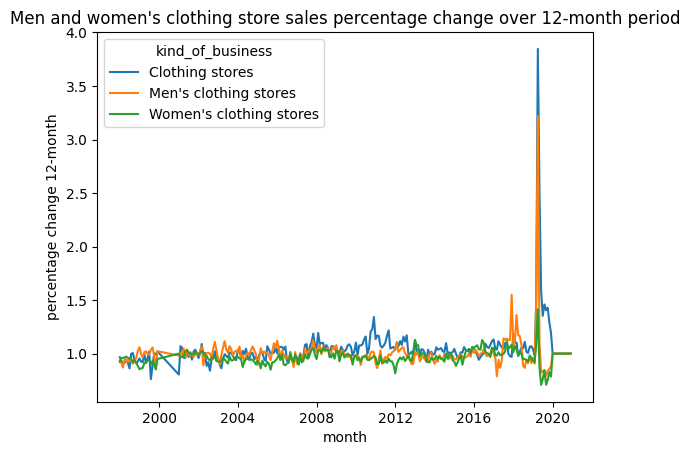

In [ ]:
p12 = sns.lineplot(data=data_c, x='month', y='pct_ch_12', hue='kind_of_business')
p12.set_ylabel("percentage change 12-month")
p12.set_title("Men and women's clothing store sales percentage change over 12-month period")

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

A rolling time windows analysis of the mrts_data is used to assess the data stability over time. When analyzing the monthly sales, quaterly, and anual sales of the electronic shopping and mail-order houses, and grocery stores the key assumption is that the parameters are constant over time. However, the sales as shown in the graphs below often changes considerably. A rolling window of three fixed times (3-month, 6-month, and 12-month) has queried through the data, the 12-month rolling windows captured the the downward of the electronic shopping and grocery stores impacted by the pandemic and yield process and rise in total sales after the second quarter of 2020.



In [ ]:
# Import Electronic shopping and mail-order houses sales data from SQL Database


cnx=mysql.connector.connect(user='root',
    password='8eL43NthR2c:',
    host='localhost',
    database='mrts_data')

cursor = cnx.cursor()



sqlel = (""" 
SELECT 
DATE_FORMAT(period,'%m/%d/%Y') as month,
kind_of_business,
Value as sales
FROM mrts_data.mrts_table
WHERE kind_of_business IN ('Electronic shopping and mail-order houses') ;
    """)


cursor.execute(sqlel)  
    
list = cursor.fetchall()
electronic_mail = pd.DataFrame (list, columns=['month','kind_of_business','sales'])

electronic_mail.month = pd.to_datetime(electronic_mail.month)
                        
electronic_mail['moving_average_3'] = electronic_mail['sales'].rolling(window=3).mean()
electronic_mail['moving_average_6'] = electronic_mail['sales'].rolling(window=6).mean()
electronic_mail['moving_average_12'] = electronic_mail['sales'].rolling(window=12).mean()
print(electronic_mail)
    

cursor.close()
conn.close() 

         month                           kind_of_business    sales  \
0   2020-01-01  Electronic shopping and mail-order houses  53485.0   
1   2020-02-01  Electronic shopping and mail-order houses  50716.0   
2   2020-03-01  Electronic shopping and mail-order houses  58622.0   
3   2020-04-01  Electronic shopping and mail-order houses  67339.0   
4   2020-05-01  Electronic shopping and mail-order houses  72558.0   
..         ...                                        ...      ...   
271 1998-08-01  Electronic shopping and mail-order houses   6056.0   
272 1998-09-01  Electronic shopping and mail-order houses   6711.0   
273 1998-10-01  Electronic shopping and mail-order houses   7483.0   
274 1998-11-01  Electronic shopping and mail-order houses   8156.0   
275 1998-12-01  Electronic shopping and mail-order houses   9815.0   

     moving_average_3  moving_average_6  moving_average_12  
0                 NaN               NaN                NaN  
1                 NaN               N

Text(0.5, 1.0, 'Electronic shopping and mail-order houses 3-month moving average sales')

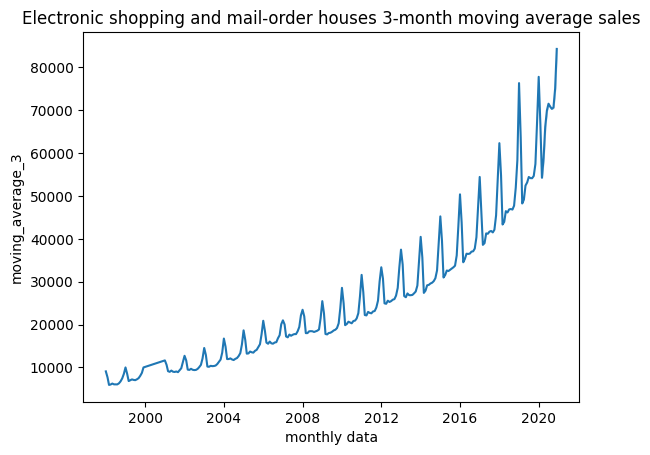

In [ ]:
# Electronic shopping and mail-order houses 3-month moving average sales
food_drink1 = sns.lineplot(data=food_drink, x='month', y='moving_average_3')
food_drink1.set_xlabel("monthly data")
food_drink1.set_title("Electronic shopping and mail-order houses 3-month moving average sales")

Text(0.5, 1.0, 'Electronic shopping and mail-order houses 6-month moving average sales')

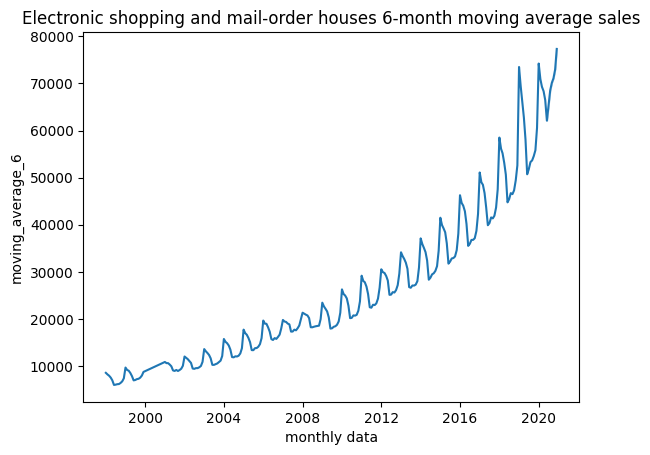

In [ ]:
# Electronic shopping mail-order houses 6-month moving average sales
electronic_mail2 = sns.lineplot(data=electronic_mail, x='month', y='moving_average_6')
electronic_mail2.set_xlabel("monthly data")
electronic_mail2.set_title("Electronic shopping and mail-order houses 6-month moving average sales")

Text(0.5, 1.0, 'Electronic shopping and mail-order houses 12-month moving average sales')

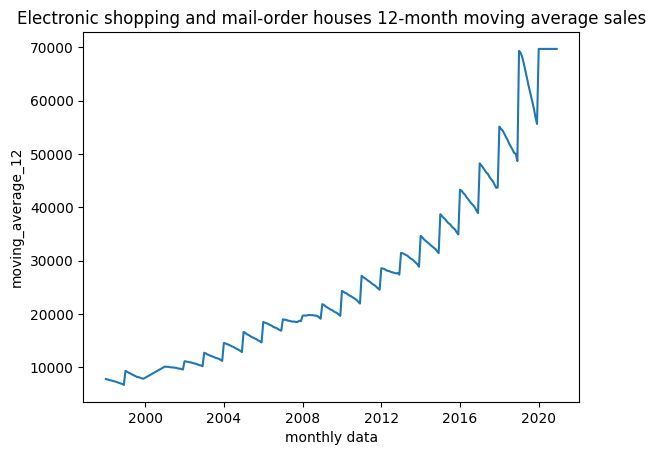

In [ ]:
# Electronic shopping mail-order houses 12-month moving average sales
electronic_mail3 = sns.lineplot(data=electronic_mail, x='month', y='moving_average_12')
electronic_mail3.set_xlabel("monthly data")
electronic_mail3.set_title("Electronic shopping and mail-order houses 12-month moving average sales")

In [ ]:
#Import grocery stores sales data from SQL and calculate rolling means 

cnx=mysql.connector.connect(user='root',
    password='8eL43NthR2c:',
    host='localhost',
    database='mrts_data')

cursor = cnx.cursor()


sqlg = (""" 
SELECT 
DATE_FORMAT(period,'%m/%d/%Y') as month,
kind_of_business,
value as sales
FROM mrts_data.mrts_table
WHERE kind_of_business IN ('Grocery stores') ;
    """)


cursor.execute(sqlg)

    
    
list = cursor.fetchall()
grocery = pd.DataFrame (list, columns=['month','kind_of_business','sales'])

grocery.month = pd.to_datetime(food_drink.month)
                        
grocery['moving_average_3'] = grocery['sales'].rolling(window=3).mean()
grocery['moving_average_6'] = grocery['sales'].rolling(window=6).mean()
grocery['moving_average_12'] = grocery['sales'].rolling(window=12).mean()
print(grocery)

cursor.close()
conn.close()

         month kind_of_business    sales  moving_average_3  moving_average_6  \
0   2020-01-01   Grocery stores  58722.0               NaN               NaN   
1   2020-02-01   Grocery stores  55870.0               NaN               NaN   
2   2020-03-01   Grocery stores  73901.0      62831.000000               NaN   
3   2020-04-01   Grocery stores  64383.0      64718.000000               NaN   
4   2020-05-01   Grocery stores  68436.0      68906.666667               NaN   
..         ...              ...      ...               ...               ...   
271 1998-08-01   Grocery stores  32220.0      32167.333333      31714.166667   
272 1998-09-01   Grocery stores  31005.0      32097.333333      31798.166667   
273 1998-10-01   Grocery stores  32214.0      31813.000000      32029.500000   
274 1998-11-01   Grocery stores  31377.0      31532.000000      31849.666667   
275 1998-12-01   Grocery stores  34681.0      32757.333333      32427.333333   

     moving_average_12  
0             

Text(0.5, 1.0, 'Grocery stores 3-month moving average sales')

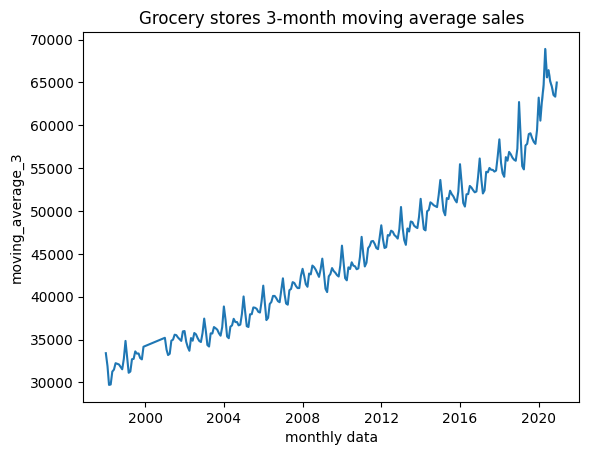

In [ ]:
# Grocery stores 3-month moving average sales
grocery1 = sns.lineplot(data=grocery, x='month', y='moving_average_3')
grocery1.set_xlabel("monthly data")
grocery1.set_title("Grocery stores 3-month moving average sales")

Text(0.5, 1.0, 'Grocery stores 6-month moving average sales')

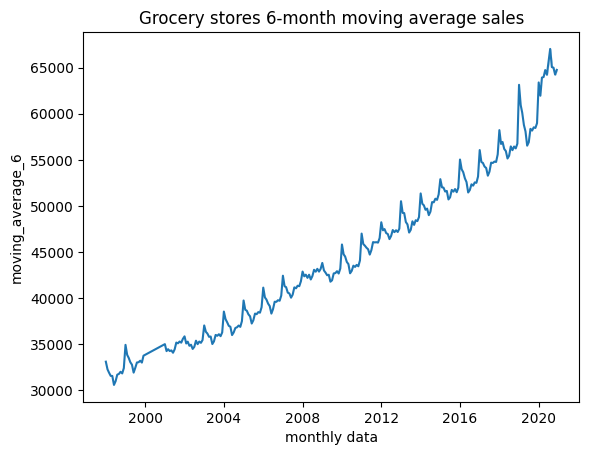

In [ ]:
# Grocery stores 6-month moving average sales
grocery2 = sns.lineplot(data=grocery, x='month', y='moving_average_6')
grocery2.set_xlabel("monthly data")
grocery2.set_title("Grocery stores 6-month moving average sales")

Text(0.5, 1.0, 'Grocery stores 12-month moving average sales')

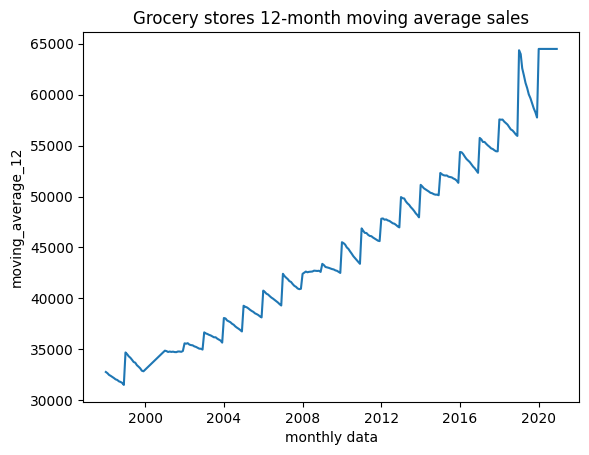

In [ ]:
# Grocery stores 12-month moving average sales
grocery3 = sns.lineplot(data=grocery, x='month', y='moving_average_12')
grocery3.set_xlabel("monthly data")
grocery3.set_title("Grocery stores 12-month moving average sales")

[Back to top](#Index)

## Conclusion

The Monthly Retail Trade Survey offers insight into economic trends that exist at a more granular level. However, data quality must be analyzed carefully. The retail and food services sales will continue to attract consumers spending, with projection of 10 percent change rate. Motor vehicles, parts, and gasoline station will generates high spending in 2021 due to high demands and will also have a spike in rolling time rate. Sporting goods, hobby, musical
instrument, and book stores. Furniture and home furniture stores, Electronics and appliance stores will have a downward trend and consumers spending confidence will continue to be in decline, the change rate will remain below 2 percent and negative during steep downward trends. The result of sales during the pandemic may seem resonable and it will improve and exceed market predictions in 2022 and 2023. 





[Back to top](#Index
)
## References

>* BUREAU OF THE CENSUS
STATISTICAL RESEARCH DIVISION REPORT SERIES
SRD Research Report Number: CENSUS/SRD/RK-84113
AN IMPUTATION STUDY FOR THE MONTHLY RETAIL
TRADE SURVEY
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.74.4583&rep=rep1&type=pdf

>* Annual Benchmark Report for
Retail Trade and Food Services:
January 1992 Through February 2004
A Detailed Summary of Retail Sales, Purchases,
Accounts Receivable, Inventories, and Food Services Sales
https://www2.census.gov/retail/releases/benchmark/annpub03.pdf

>* AN ANALYSIS OF THE ADVANCE MONTHLY RETAIL SALES SURVEY
Julia L. Bienias, William Davie, Jr., Howard Hogan, Carl A. Konschnik, Bureau of the Census
Carl A. Konschnik, Bureau of the Census, Washington, DC 20233 ckonschnik@ccmail.census.gov 
http://www.asasrms.org/Proceedings/papers/1996_119.pdf



